In [60]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [61]:
# https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html

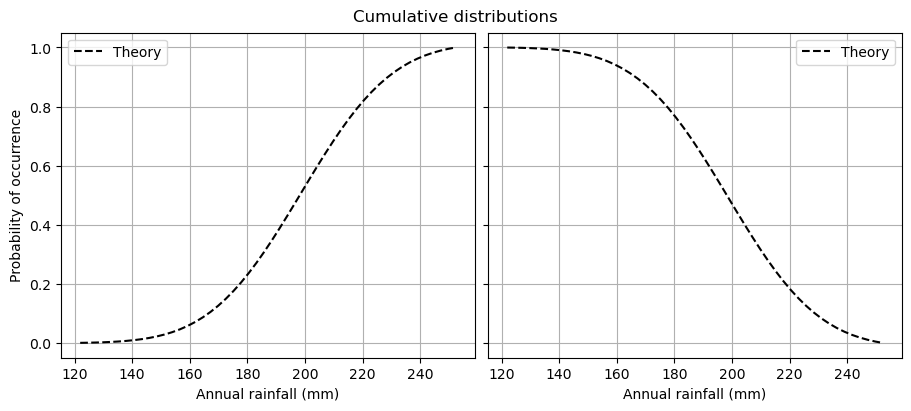

In [62]:

np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 25
data = np.random.normal(mu, sigma, size=100)

fig = plt.figure(figsize=(9, 4), layout="constrained")
axs = fig.subplots(1, 2, sharex=True, sharey=True)

# Cumulative distributions.
#axs[0].math.ecdf(data, label="CDF")
#n, bins, patches = axs[0].hist(data, n_bins, density=True, histtype="step",cumulative=True, label="Cumulative histogram")


x = np.linspace(data.min(), data.max())
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (x - mu))**2))
y = y.cumsum()
y /= y[-1]
axs[0].plot(x, y, "k--", linewidth=1.5, label="Theory")

# Complementary cumulative distributions.
#axs[1].ecdf(data, complementary=True, label="CCDF")
#axs[1].hist(data, bins=bins, density=True, histtype="step", cumulative=-1, label="Reversed cumulative histogram")
axs[1].plot(x, 1 - y, "k--", linewidth=1.5, label="Theory")

# Label the figure.
fig.suptitle("Cumulative distributions")
for ax in axs:
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("Annual rainfall (mm)")
    ax.set_ylabel("Probability of occurrence")
    ax.label_outer()

plt.show()

In [63]:
# plot 
# https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html
# https://uk.mathworks.com/help/matlab/ref/erf.html


def cumulative_dist(x, mu=0.0, sigma=1.0):
        
    A = ( (1.0 + math.sqrt(5.0)/2.0) (x - mu / sigma))
    B = ( 0.5 * ( 1.0 + math.erf ( x- mu / sigma ( math.sqrt(2.0)) )))
        
    return A==B



$
\phi \big(  \frac{x-\mu} {\sigma}  \big) = \frac{1}{2} \big[ 1 + erf ({\frac{ x - \mu }{ \sigma  \sqrt 2} }) \big]
$

In [64]:
def cum_dist(x, mu=0.0, sigma=1.0):
    A = 3.14159 *( x - mu / sigma) 

    return A

In [65]:
cum_dist(0.0, mu=0.0, sigma=np.sqrt(0.2) )

0.0

In [72]:
def cum_dist2(x, mu=0.0, sigma=1.0):

    B = ( 0.5 * ( 1.0 + math.erf ( x- mu / sigma * ( math.sqrt(2.0)) )))

    return B

In [73]:
cum_dist2(0.0, mu=0.0, sigma=np.sqrt(0.2) )

0.5

TypeError: only size-1 arrays can be converted to Python scalars

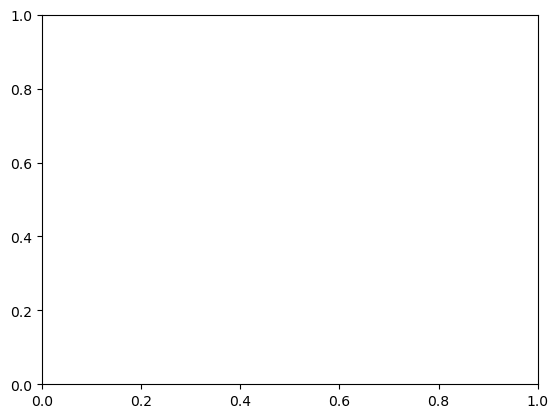

In [75]:
fig, ax = plt.subplots()

x = np.linspace(-5.0, 5.0, 1001)

for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    ax.plot(x, cum_dist2(x, mu=mu, sigma=np.sqrt(sigma2)))


AttributeError: 'Axes' object has no attribute 'math'

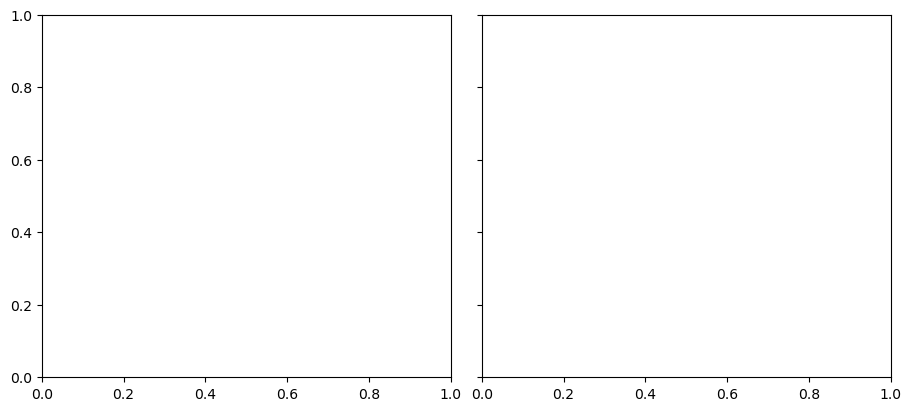

In [78]:
from scipy import stats
import math
np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 25
data = np.random.normal(mu, sigma, size=100)

fig = plt.figure(figsize=(9, 4), layout="constrained")
axs = fig.subplots(1, 2, sharex=True, sharey=True)

# Cumulative distributions.
axs[0].math.ecdf(data, label="CDF")
n, bins, patches = axs[0].hist(data, n_bins, density=True, histtype="step",cumulative=True, label="Cumulative histogram")


x = np.linspace(data.min(), data.max())
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (x - mu))**2))
y = y.cumsum()
y /= y[-1]
axs[0].plot(x, y, "k--", linewidth=1.5, label="Theory")

# Complementary cumulative distributions.
#axs[1].ecdf(data, complementary=True, label="CCDF")
#axs[1].hist(data, bins=bins, density=True, histtype="step", cumulative=-1, label="Reversed cumulative histogram")
#axs[1].plot(x, 1 - y, "k--", linewidth=1.5, label="Theory")

# Label the figure.
fig.suptitle("Cumulative distributions")
for ax in axs:
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("Annual rainfall (mm)")
    ax.set_ylabel("Probability of occurrence")
    ax.label_outer()

plt.show()

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

#define x and y values to use for CDF
x = np.linspace(-4, 4, 1000)
y = cum_dist2(x)
#ax.plot(x, cum_dist2(x, mu=0.0, sigma=np.sqrt(0.2)))
#ax.plot(x, normal_pdf(x, mu=0.0, sigma=np.sqrt(1.0)))
#ax.plot(x, normal_pdf(x, mu=0.0, sigma=np.sqrt(5.0)))
#ax.plot(x, normal_pdf(x, mu=-2.0, sigma=np.sqrt(0.5)))

#plot normal CDF
plt.plot(x, y)

TypeError: only size-1 arrays can be converted to Python scalars

In [90]:
x = (-3.0, 0.1, 3.0)
y = 0.5 * 1.0 * x / 1.41421356237

#B = ( 0.5 * ( 1.0 + math.erf ( x- mu / sigma * ( math.sqrt(2.0)) )))

plt.plot(x,y)

#grid on
#title('CDF of normal distribution with \mu = 0 and \sigma = 1')
#xlabel('x')
#ylabel('CDF')

TypeError: can't multiply sequence by non-int of type 'float'

In [93]:
from math import *
def Cumulative_Dist(x, mu=0.0, sigma=1.0):
    #'Cumulative distribution function for the standard normal distribution'
    A = (1.0 + erf(x - mu/ sigma * sqrt(2.0))) / 2.0

    return A 

In [94]:
Cumulative_Dist(0.0, mu=-2.0, sigma=sqrt(0.5))

0.999999992291371